# Visualisasi Data Youtube Rewind 2023

In [1]:
from nltk.tokenize import word_tokenize
from pymongo import MongoClient
from dotenv import load_dotenv
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import os

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Memuat value dari file .env

In [2]:
load_dotenv()

mongodb_url = os.getenv('URL_SANDY')
local_url = os.getenv('URL_LOCAL')

In [3]:
# Membuat koneksi ke MongoDB
client = MongoClient(local_url)
db = client["youtube_rewind_indonesia"]  # Ganti dengan nama database Anda
collection = db["full_labeling_2023"]

# Mengambil data dari koleksi MongoDB
data = list(collection.find())
df = pd.DataFrame(data)

df

,_id,textOriginal,predicted_label
0,6651a6a8c14ed2b8f4863c64,kurang nih kreator gamenya ga lengkap,netral
1,6651a6a8c14ed2b8f4863c65,wah hebat keren banget,positif
2,6651a6a8c14ed2b8f4863c66,akting briyan furant sih,netral
3,6651a6a8c14ed2b8f4863c67,akhir liat miawaug rewind bener sih iklan hoto...,netral
4,6651a6a8c14ed2b8f4863c68,rewind henti indonesia,positif
...,...,...,...
9995,6651a6a8c14ed2b8f486636f,jujur yang paling bkin gua haru,netral
9996,6651a6a8c14ed2b8f4866370,mantap keren,positif
9997,6651a6a8c14ed2b8f4866371,keren,positif
9998,6651a6a8c14ed2b8f4866372,moga video tragedi gunung marapi sumatra barat...,positif


### Visualisasi dengan Word Cloud

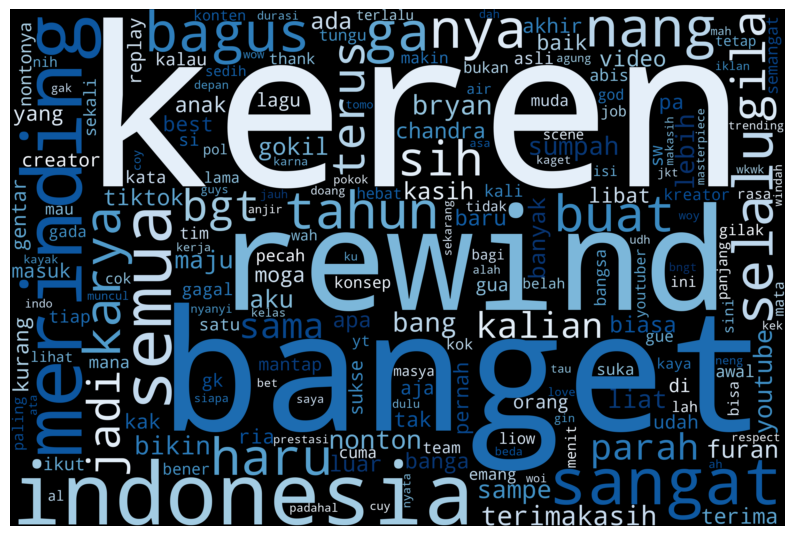

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

all_words = ' '.join([comments for comments in df["textOriginal"]])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color="black",
    colormap="Blues_r",
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

### Visualisasi dengan Bar Chart

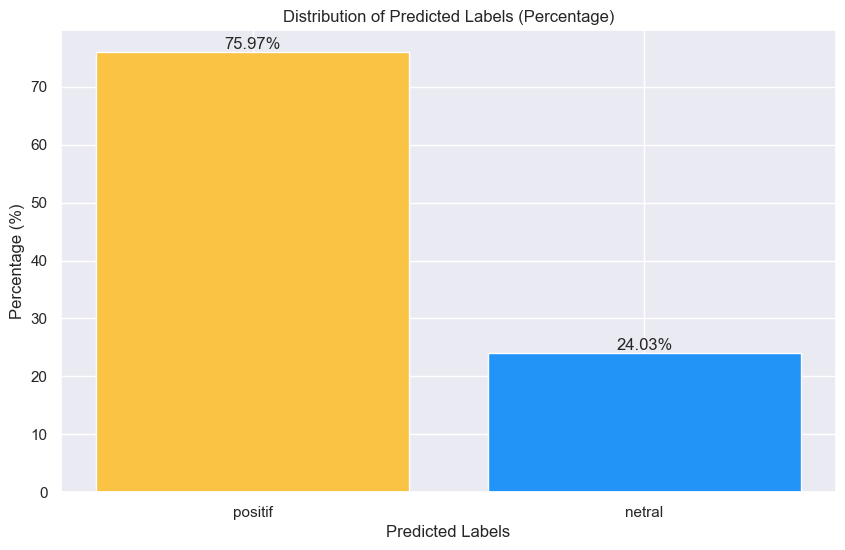

In [5]:
sns.set_theme()

if 'predicted_label' in df.columns:
    # Menghitung jumlah masing-masing label
    label_counts = df['predicted_label'].value_counts()
    total_count = label_counts.sum()
    
    # Menghitung persentase masing-masing label
    label_percentages = (label_counts / total_count) * 100
    
    # Membuat bar chart
    plt.figure(figsize=(10, 6))
    bars = plt.bar(label_percentages.index, label_percentages.values, color=["#fac343", "#2394f7", "#f72323"])

    # Menambahkan nilai persentase pada masing-masing bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}%', ha='center', va='bottom')

    plt.title('Distribution of Predicted Labels (Percentage)')
    plt.xlabel('Predicted Labels')
    plt.ylabel('Percentage (%)')
    plt.show()
else:
    print("Kolom 'predicted_label' tidak ditemukan dalam koleksi full_labeling_2015.")

### Visualisasi dengan Pie Chart

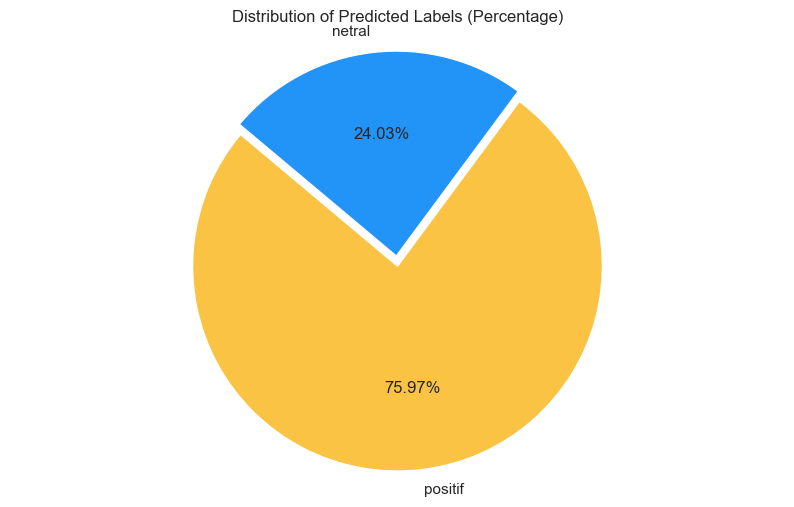

In [6]:
if 'predicted_label' in df.columns:
    # Menghitung jumlah masing-masing label
    label_counts = df['predicted_label'].value_counts()
    total_count = label_counts.sum()

    # Menghitung persentase masing-masing label
    label_percentages = (label_counts / total_count) * 100

    # Membuat pie chart
    labels = label_percentages.index
    explode = [0.05 if label == 'positif' else 0 for label in labels]

    plt.figure(figsize=(10, 6))
    plt.pie(label_percentages, labels=label_percentages.index, autopct='%1.2f%%', startangle=140, colors=["#fac343", "#2394f7", "#f72323"], explode=explode)
    plt.title('Distribution of Predicted Labels (Percentage)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("Kolom 'predicted_label' tidak ditemukan dalam koleksi full_labeling_2015.")